### 심파이를 사용한 함수 미분

- 예측 모형의 성능
     - 예측 오차가 가장 적은 최적의 예측 모형을 구하는 일
     - 함수의 계수를 바꾸는 과정
     - 선형 예측 모형의 가중치 값을 바꾸는 것을 고려
     - 모수는 항상 스칼라가 되어야 한다.
     - 일종의 다변수 함수를 구하는 것을 고려
     - 성능 함수라고 한다.
     - 손실함수, 비용함수, 오차함수라 부른다 => 목적함수
     
     - 최적화 : 모수를 구하는 과정, 목적 함수의 값을 구하기
     - 미분 : 최적화를 하기 위해 입력값에 따라 함수의 출력값이 어떻게 변하는지 확인해야 함. 미분이 그런 과정
     
         - 예제 : 조절나사 스피커 앰프 각도 찾는 문제

- 기울기
    - 수치적 최적화는 가장 적은 횟수로 여러가지 x값을 시도하여 최적의 값을 찾는 방법
    - 기울기, 민감도라 한다.
        - 예 : 조절나사 오른쪽 1도 이동시 소리가 작아지나 커지나
    - 입력변수 비율 변화 대비 출력 변수 비율 변화 -> 변화 값에 따라 변화율이 달라진다.
    - 기울기 : slope, dx값이 0으로 근접할 때의 변화율 의미
         - 함수의 그래프 관점에서 보는 경우
         부드러운 곡선의 형태로 나타난다. 한 점만 공통으로 가지는 접선으로 보는 경우, 기울기는 x 방향 이동거리와 y 방향 이동거리의 비율을 의미한다.

In [1]:
def f(x):
    return x**3 - 3 * x**2 + x

In [2]:
x = np.linspace(-1, 3, 400)
y = f(x)

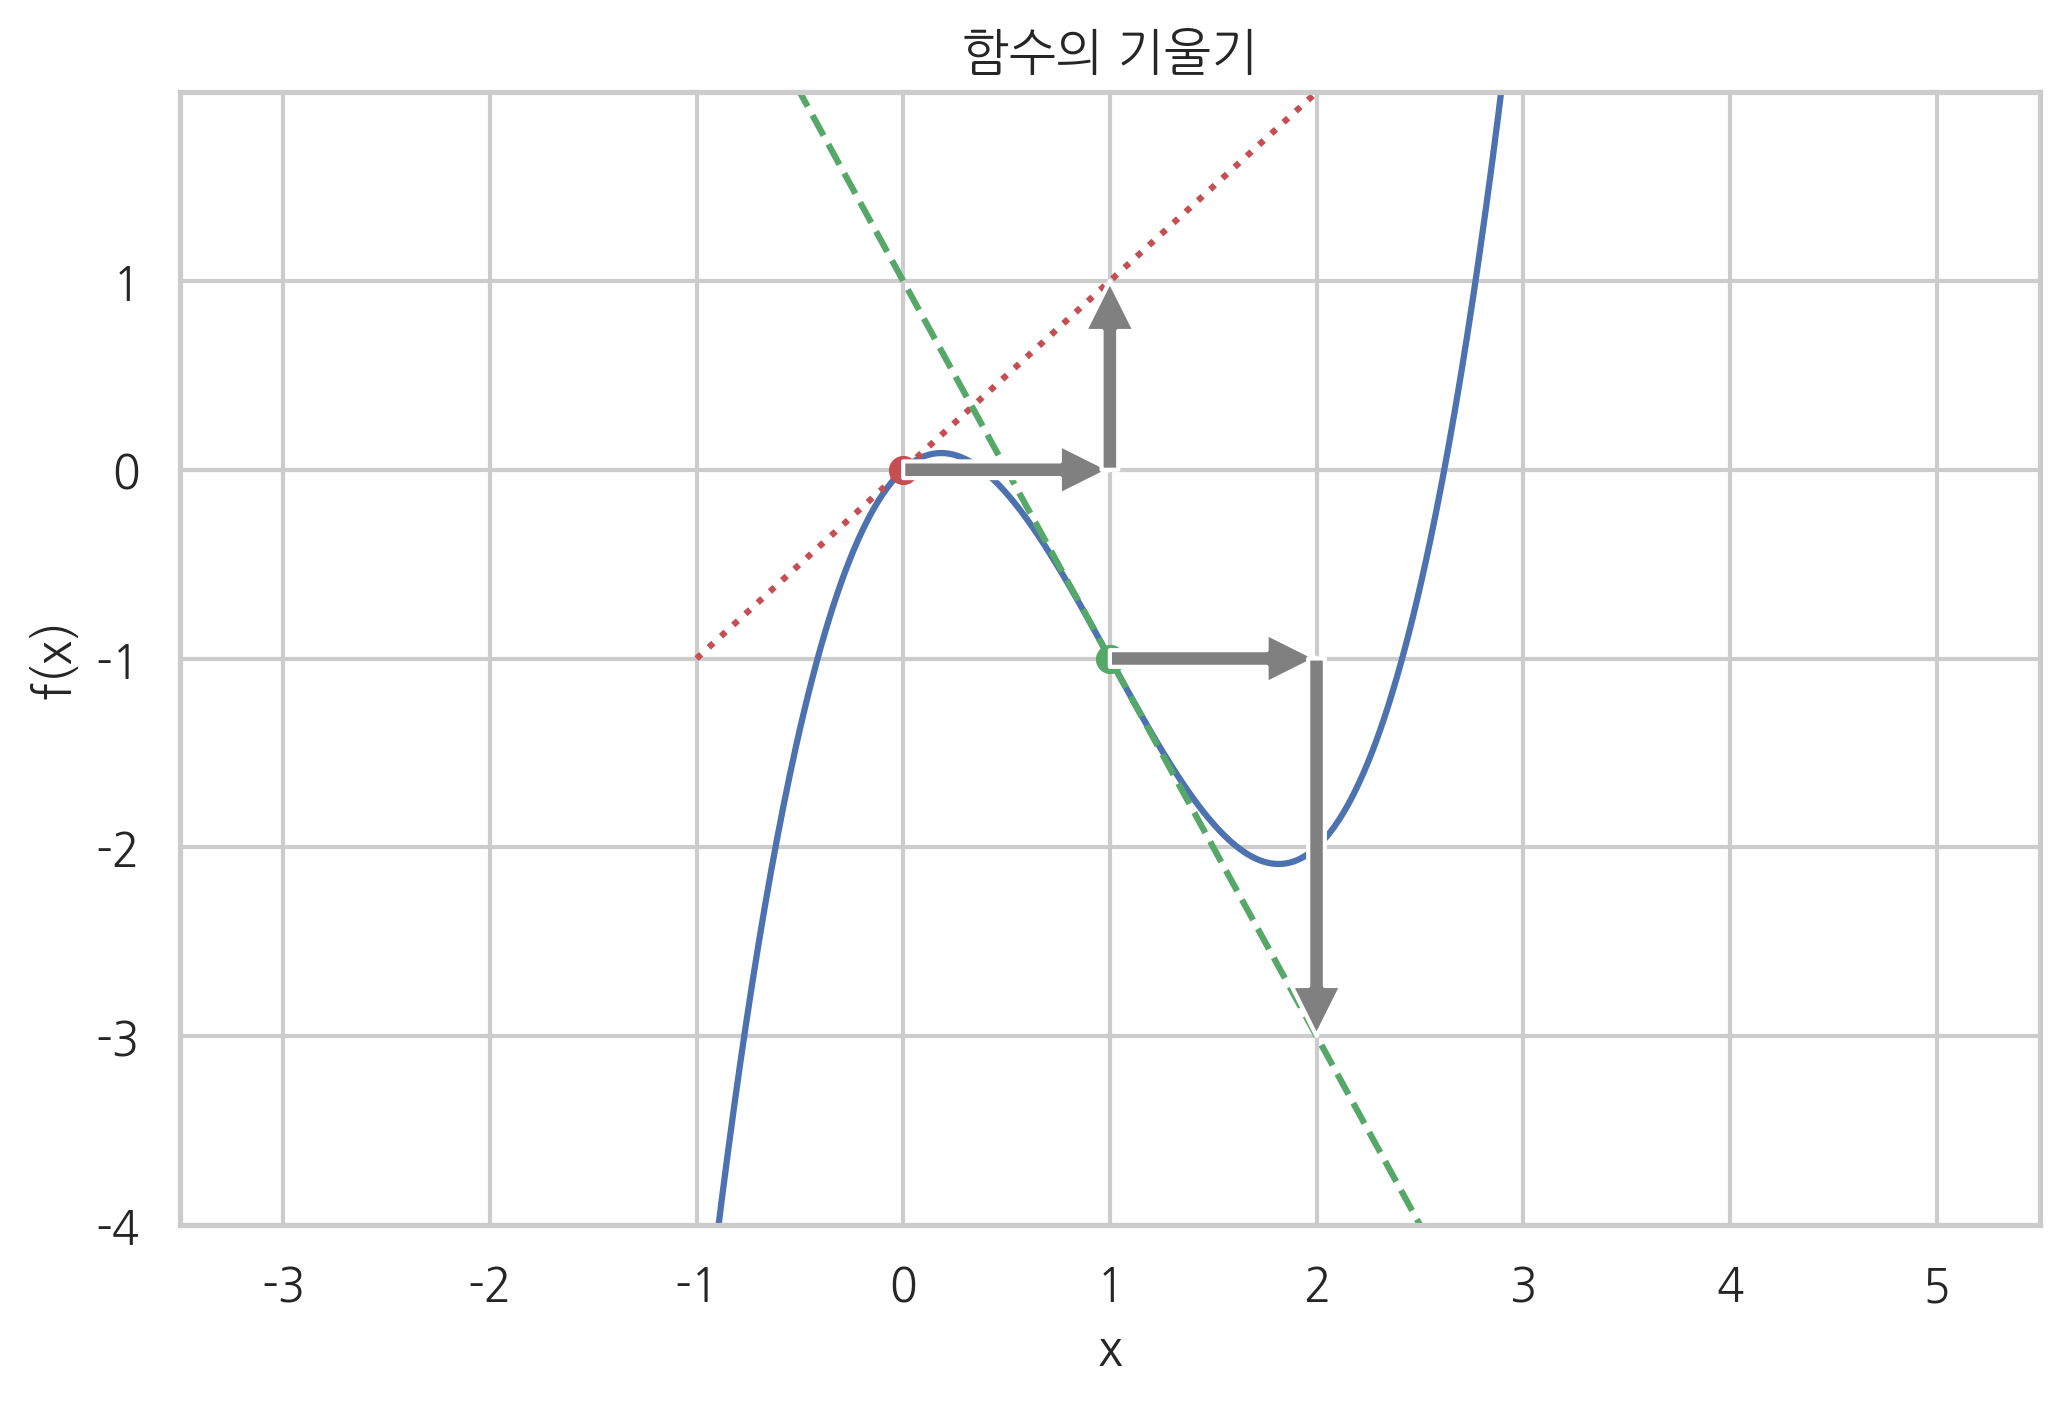

In [8]:
plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()

- 수치미분
    - 기울기를 구하는 방법 - 대략적으로 계산해준다.
    - scipy.mis 패키지에서 derivative()명령 사용하여 수치적으로 대략적인 기울기 계산 가능
    - 함수 f, 기울기 x, 이동거리 dx
    - dx 도 임의로 입력해줘야 함. 너무 작으면 부동소수점의 오버플로우 오류 발생
    

In [12]:
from scipy.misc import derivative

print(derivative(f, 0, dx=1e-6))
print(derivative(f, 1, dx=1e-10))

1.000000000001
-2.000000165480742


- 미분
    - 어떤 함수로부터 그 함수 기울기를 출력하는 새로운 함수를 만들어내는 작업
    - 도함수 : 미분으로 만들어진 함수
    - 수렴과 극한을 이용한 설명은 생략. 개념 이해와 암기
    - 도함수의 기호는 분수가 아니다.
    - f' -> f프라임, df/dx -> df 오버(over) dx

- 미분가능
    - 기울기를 구할 수 있는 경우

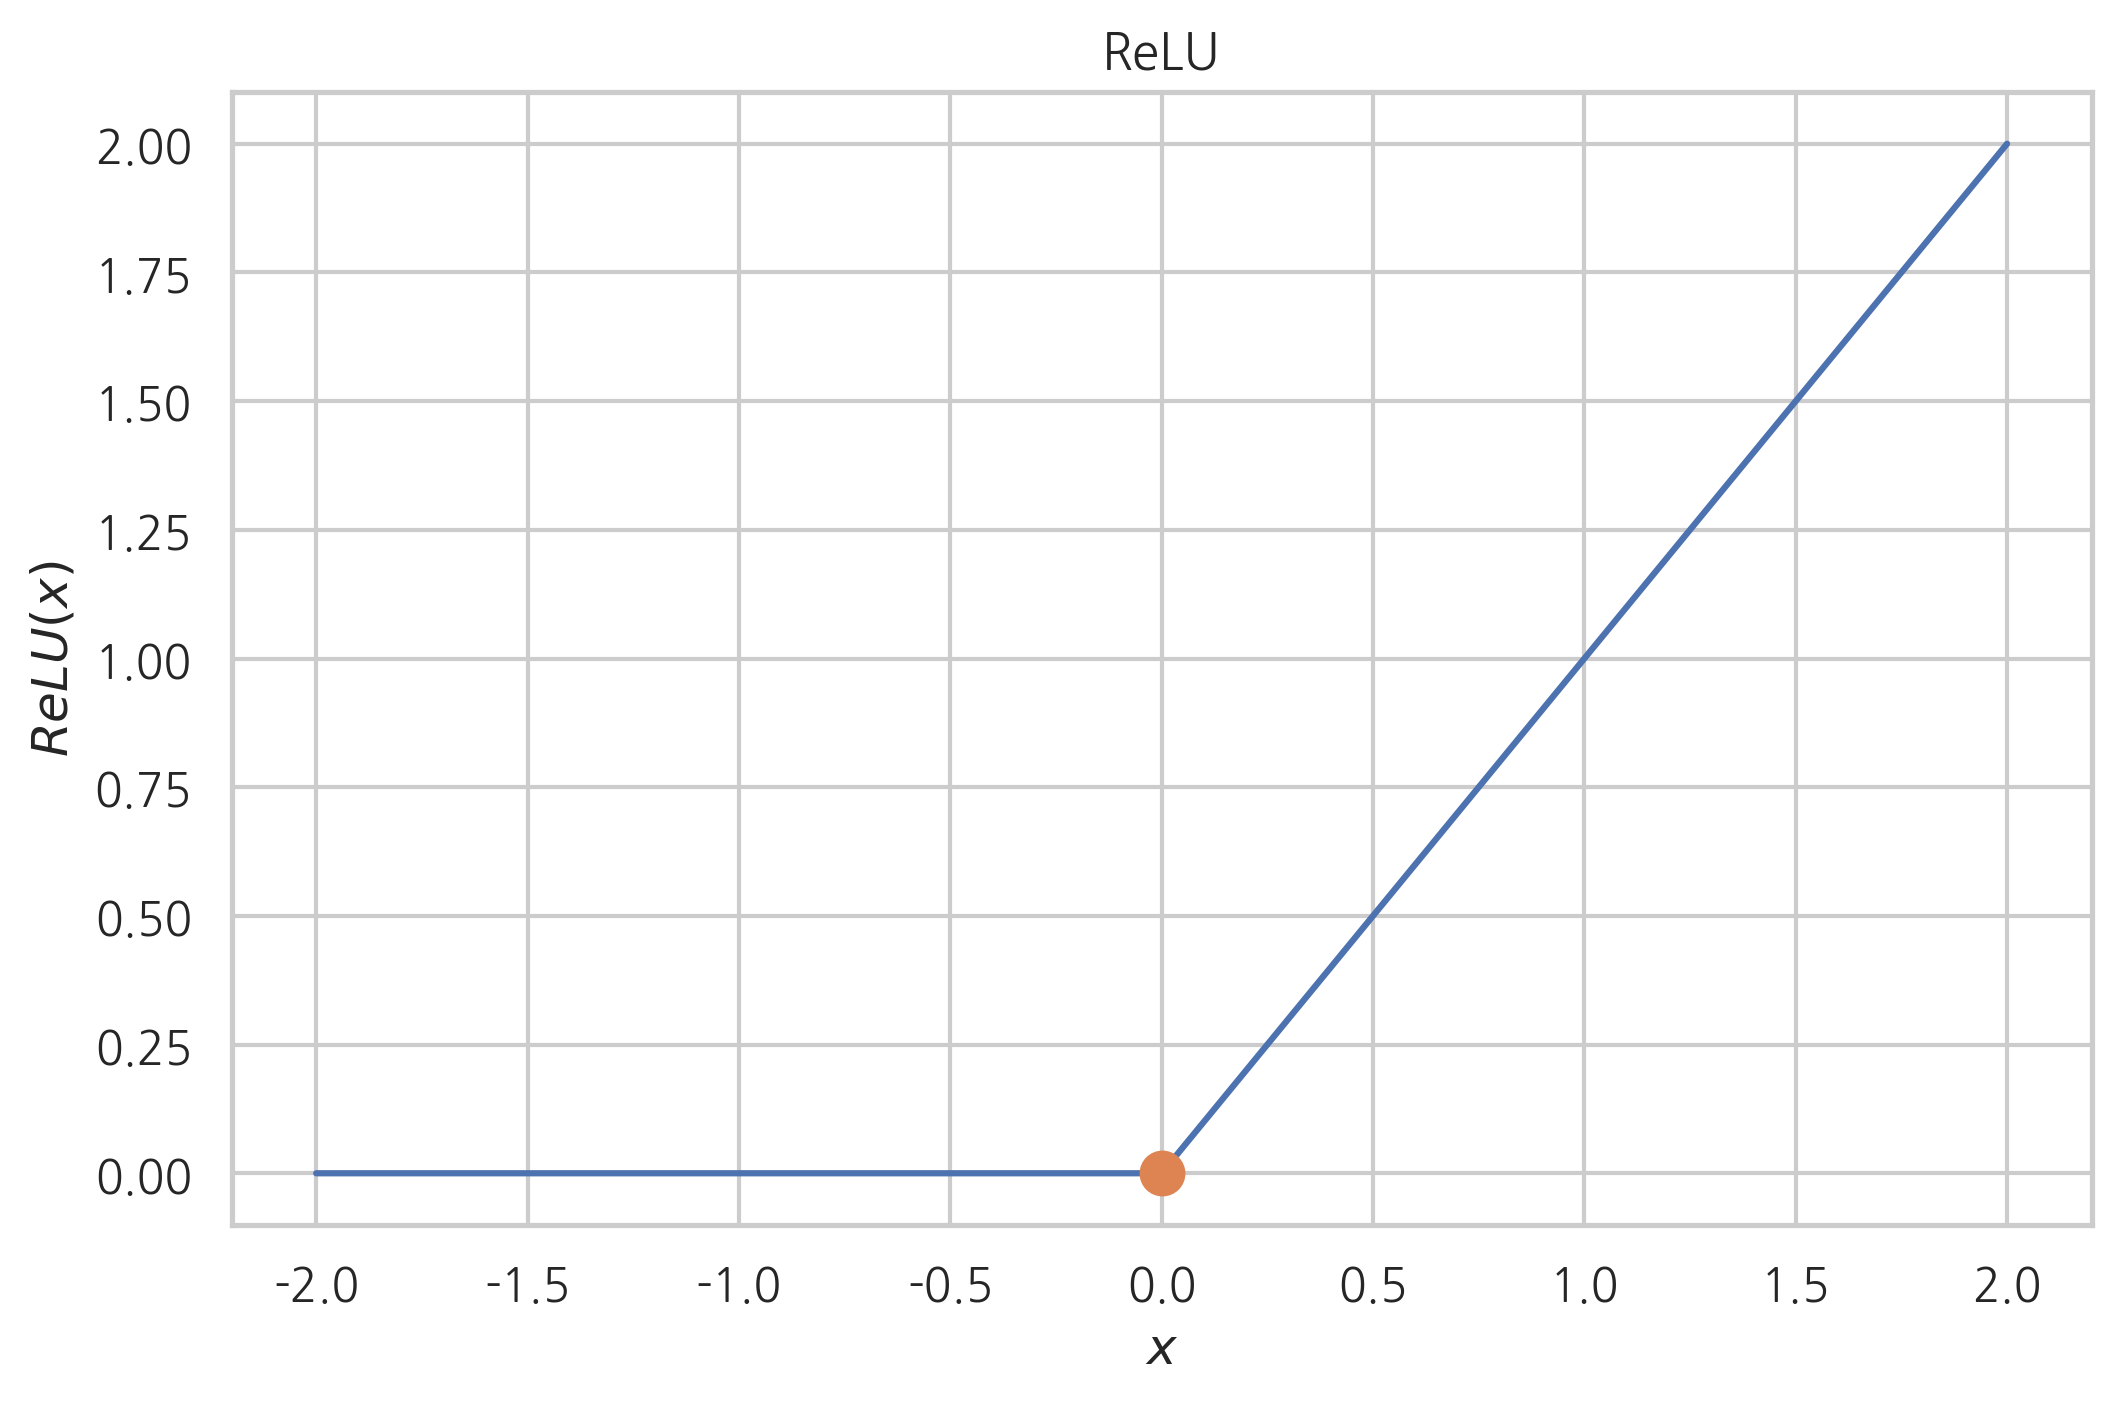

In [13]:
def relu(x):
    return np.where(x > 0, x, 0)

xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, marker='o', ms=10)
plt.title("ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()


- 미분공식
    - 기본 미분공식
    - 선형조합법칙
    - 곱셈법칙
    - 연쇄법칙

- 기본 미분공식
    - 상수, 거듭제곱, 로그함수, 지수함수 등 에 대한 미분공식
        - 상수 : 상수 미분하면 0이 된다.
        - 거듭제곱 : x의 n제곱을 미분하면 n-1 제곱으로 제곱수가 1씩 감소. n = 0 일 때 성립하지 않는다.
        - 로그함수 : 로그함수를 미분하면 1/x가 된다.
        - 지수 : 밑이 오일러 수인 지수함수는 미분해도 변하지 않는다.

- 선형조합법칙
    - 어떤 함수에 상수를 곱한 함수를 미분한 결과는 원래 함수의 도함수에 그 상수를 곱한 것과 같다.
    - 선형조합 : 어떤 함수에 각각 상수를 곱한 후 더한 것은 각 함수의 도함수를 선형조합한 것과 같다.

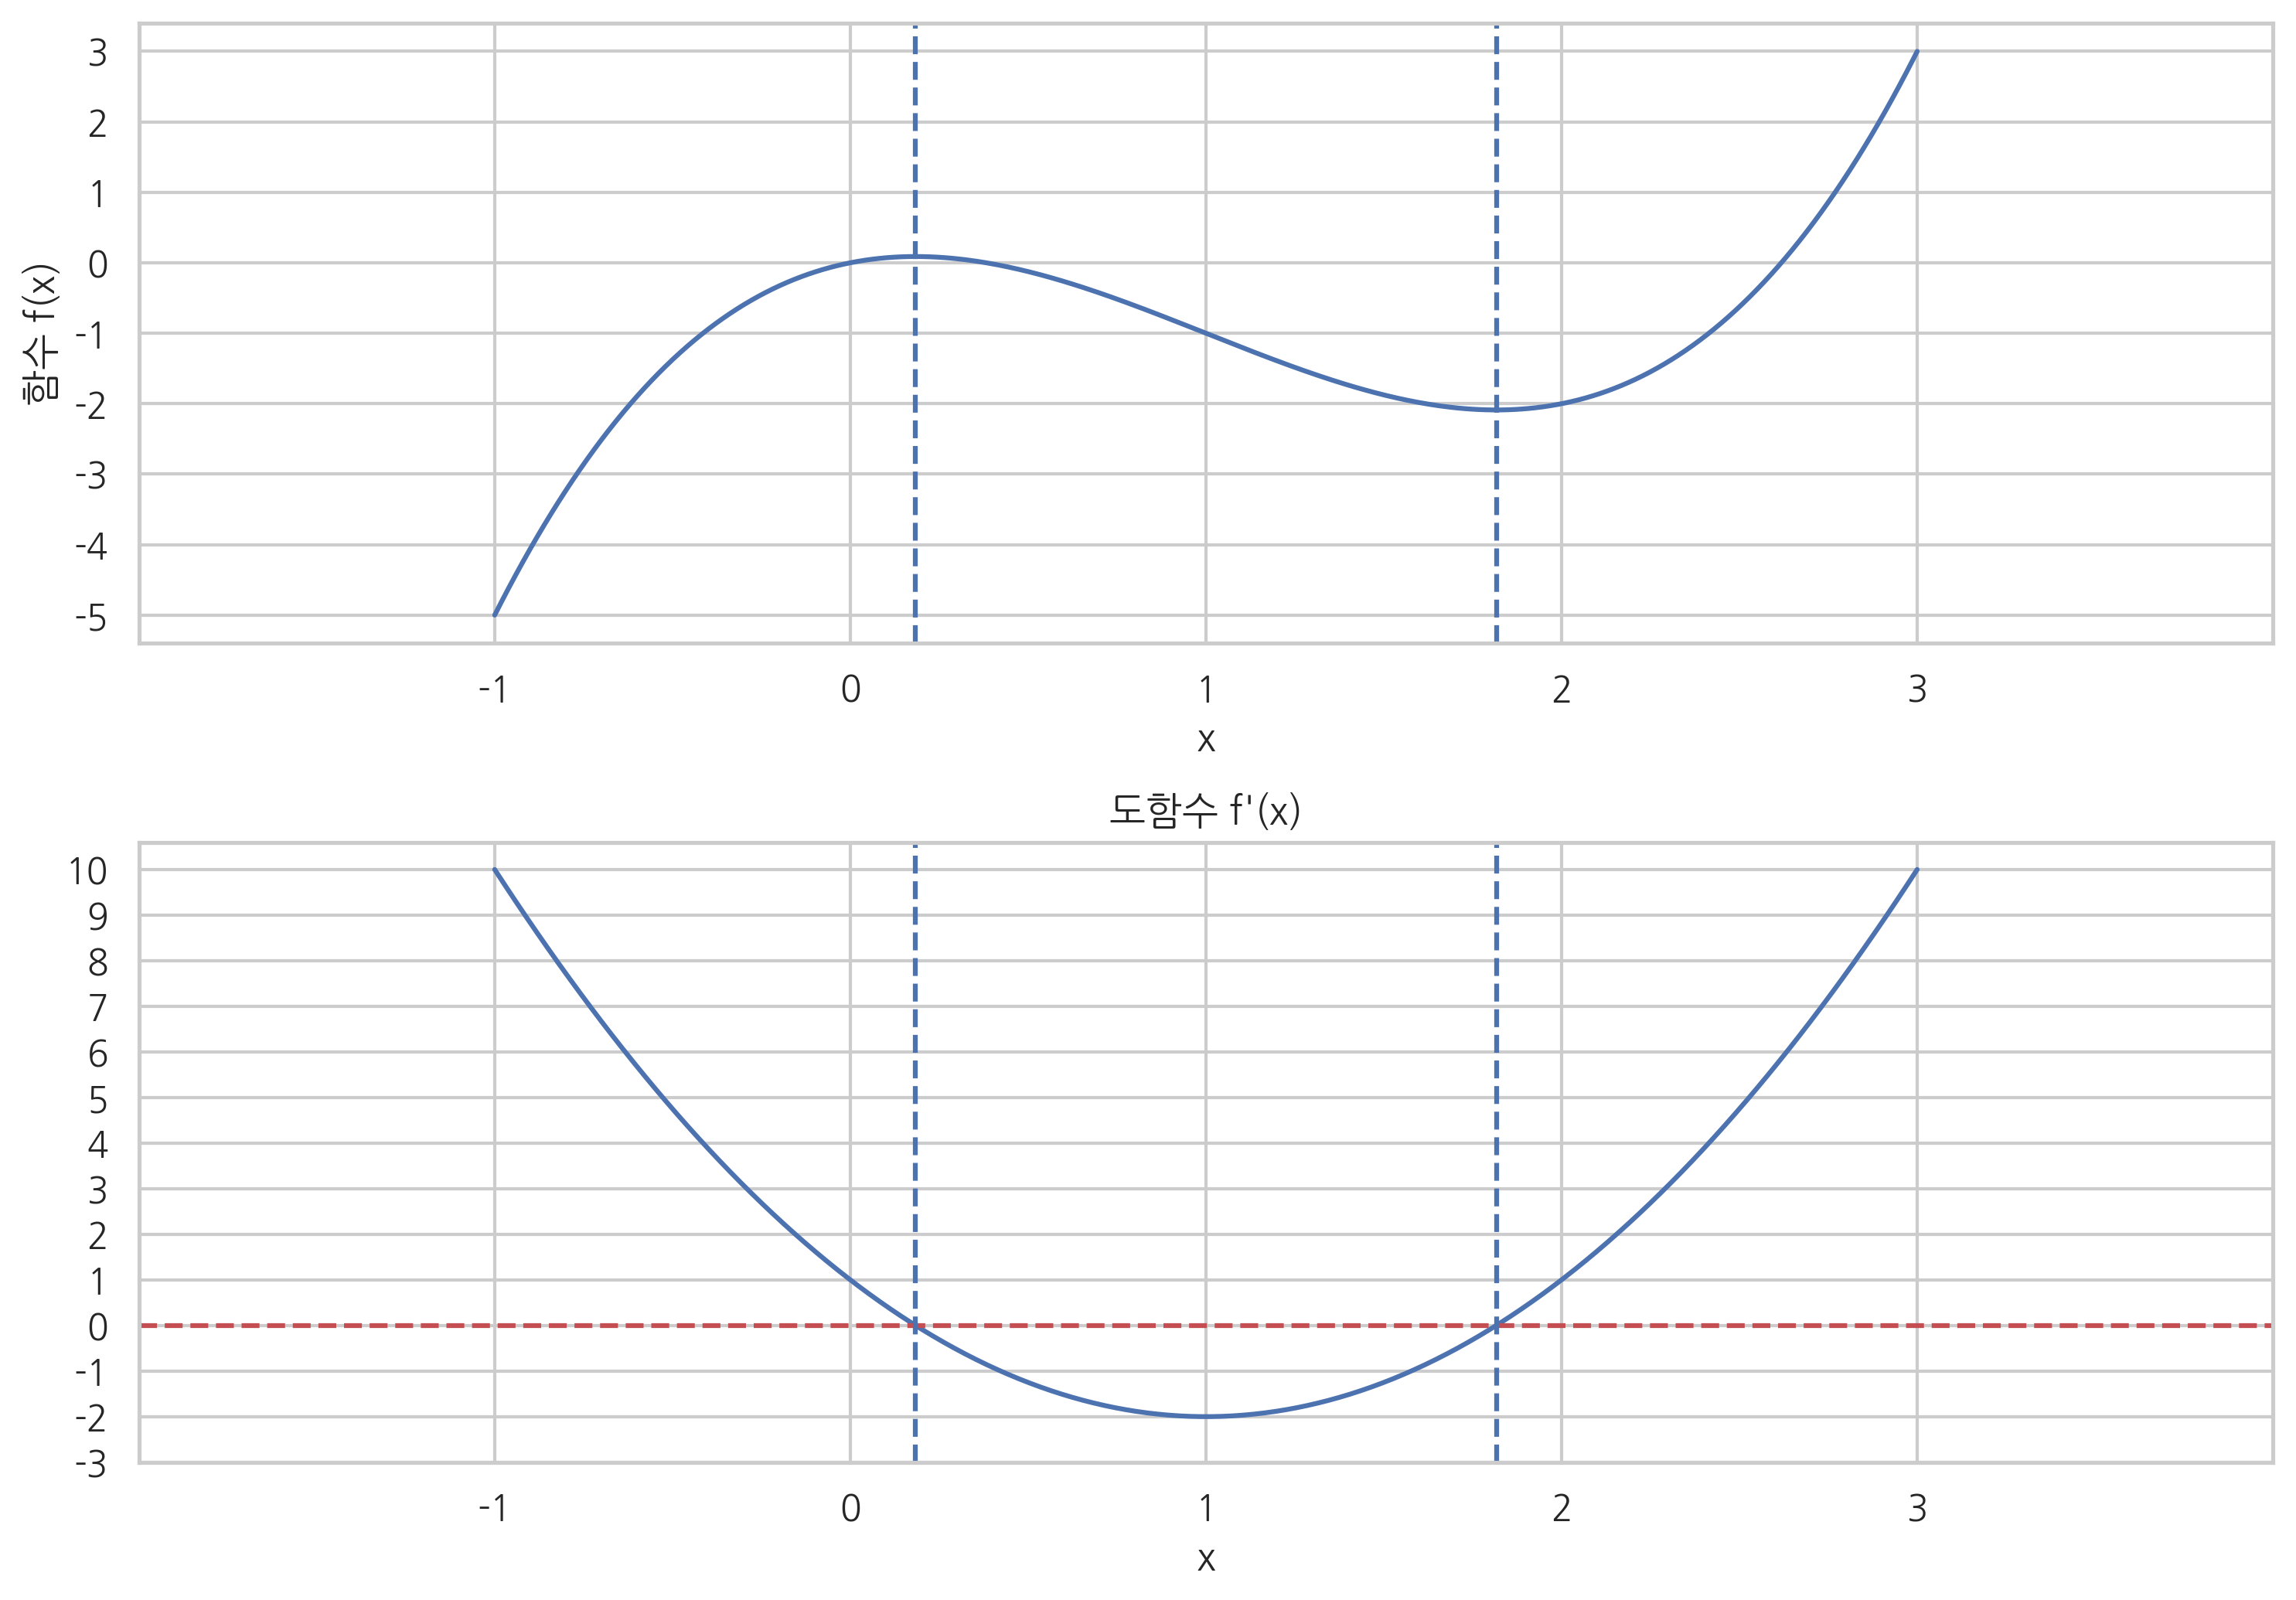

In [17]:
def fprime(x):
    return 3 * x ** 2 - 6 * x + 1

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) # 3x^2 - 6x +1 식의 근을 구해준다.
# 참고자료 : https://wikidocs.net/23285

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.ylabel('함수 f(x)')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.subplot(212) # 그래프 2개 두번째에 위치
plt.plot(x, fprime(x)) # 플롯을 그려준다. fprime 함수에 대한
plt.xlim(-2, 4) # x축에 대해 범위 설정 여기는 -2 ~ 4 까지
plt.xticks(np.arange(-1, 4)) # 그래프가 그려진다면 x축은 어디까지인지
plt.yticks(np.arange(-3, 11)) # 그래프가 그려진다면 y축은 어디까지인지
plt.xlabel('x') # x축에 대한 범례
plt.title("도함수 f'(x)") # y 축에 대한 범례
plt.axhline(0, c="r", ls="--") # 수평선 그러주기, 색깔은 red, 선 모양은 --
plt.axvline(x1, c="b", ls="--") # 구한 근에 대한 x1의 수직선 그려주기 색깔은 blue, 모양은 --
plt.axvline(x2, c="b", ls="--") # 구한 근에 대한 x2의 수직선 그려주기 색깔은 blue, 모양은 -- 

plt.tight_layout() # 적절하게 표현해줘라
plt.show() # Display a figure

- 곱셈법칙
    - 각 개별 함수의 도함수를 사용하여 원래 함수의 도함수를 구한다.

- 연쇄법칙
    - 미분하고자 하는 함수의 입력변수가 다른 함수의 출력 변수인 경우

- 2차 도함수
    - 도함수를 한번 더 미분하여 만들어진 함수
    - '' -> 두번 표시 한 것
    - 도함수의 기울기를 나타낸다.
    - 도함수 값 증가 -> 2차 도함수 값 양수 => 볼록(convex)
    - 도함수 값 감소 -> 2차 도함수 값 음수 => 오목(convexity)
    - 볼록도라고 한다.

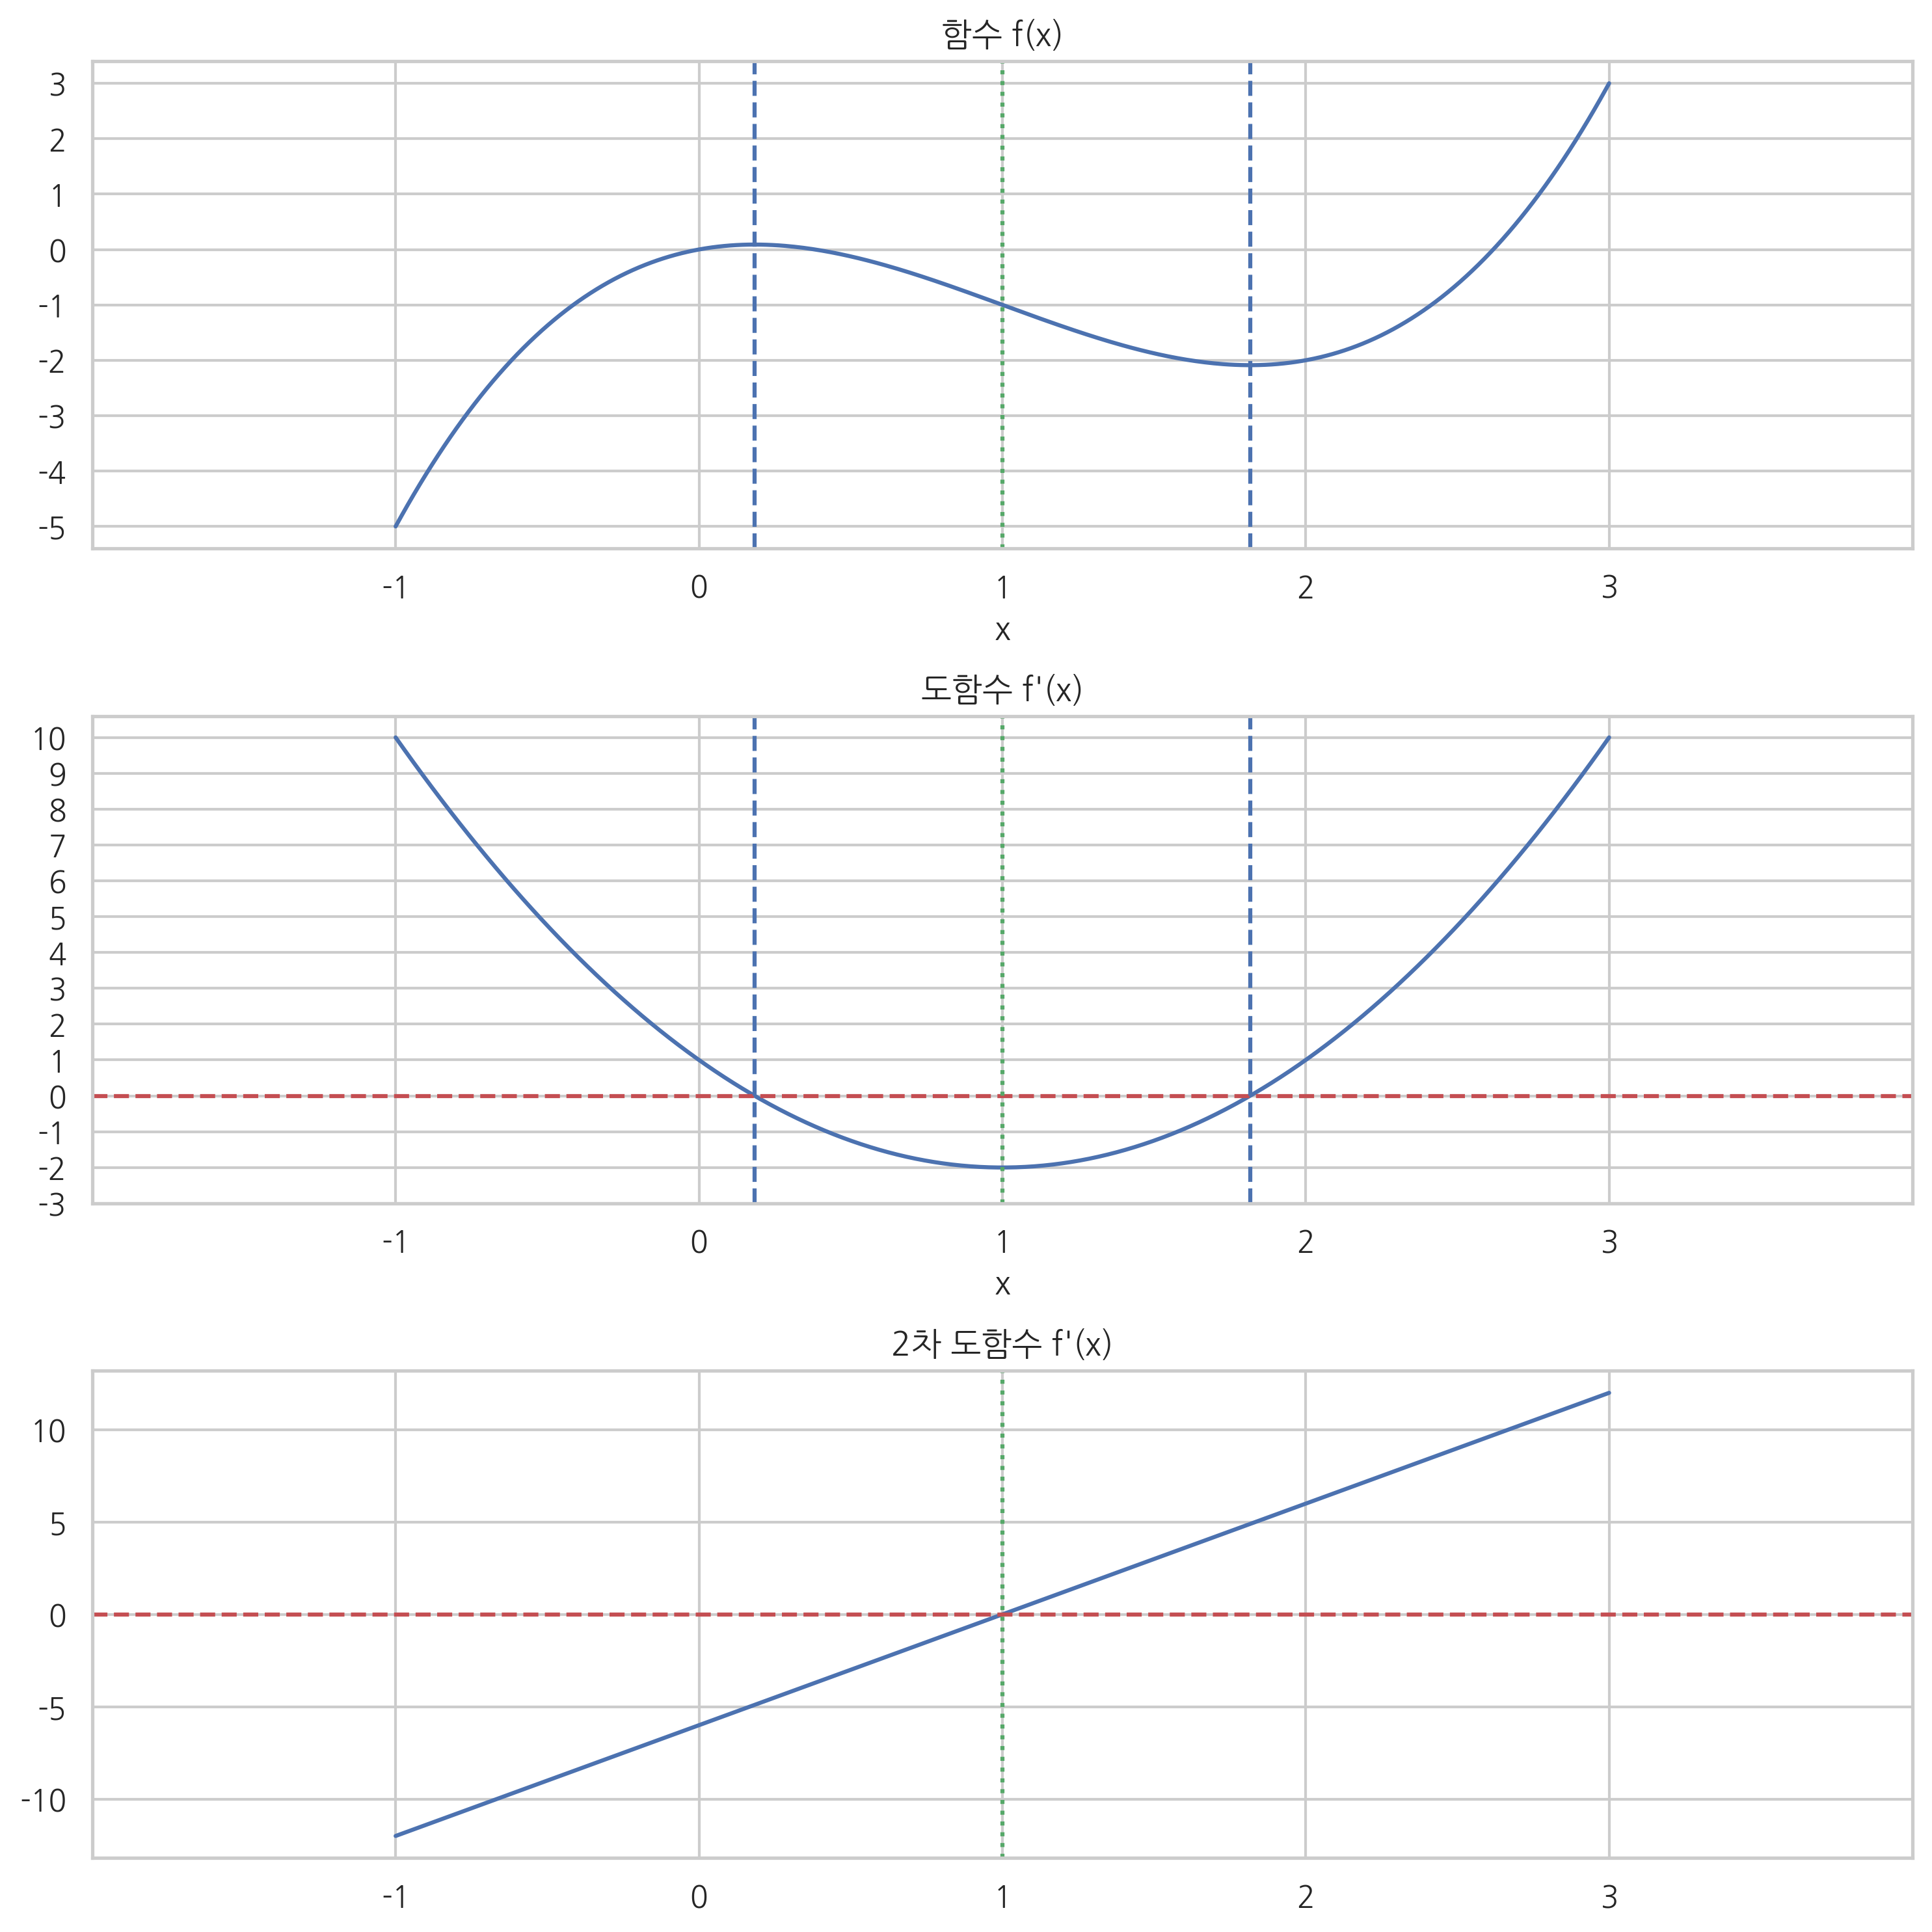

In [25]:
def fprime2(x):
    return 6*x - 6

# 2차 방정식의 근
x1, x2 - np.roots([3, -6, 1])

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('함수 f(x)')
plt.xlabel('x')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("도함수 f'(x)")
plt.xlabel('x')
plt.axhline(0, c='r', ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("2차 도함수 f'(x)")
plt.axhline(0, c='r', ls="--")
plt.axvline(1, c='g', ls=":")

plt.tight_layout()
plt.show()


- 편미분
    - 기울기는 하나의 변수에 대해서 구할 수 있다.
    - 둘 이상의 독립변수를 가지는 다변수 함수 인 경우라도
    - 표시방법 : 독립 변수(미분해아하는 변수)를 함수의 아랫첨자로 표기, 라운드 기호를 사용하여 표기.
    - 어떤 하나의 독립 변수에 대해 미분할 때는 다른 독립 변수를 상수로 생각하여 한다.

- 다변수 함수의 연쇄법칙
    - 다변수 함수 미분도 연쇄법칙 적용

- 테일러 전개
     - 함수의 기울기(1차 미분값)를 안다면 함수의 모양 근사화 가능.

- 심파이
    - 심볼릭 연산 지원 패키지

In [2]:
import sympy

sympy.init_printing(use_latex='mathjax')

In [4]:
x = sympy.symbols('x')
x
type(x)

sympy.core.symbol.Symbol

In [6]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [7]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [8]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

In [18]:
x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [19]:
sympy.diff(f, x)

2⋅x + 4⋅y

In [20]:
sympy.diff(f, y)

4⋅x + 8⋅y

In [21]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [22]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [23]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

In [24]:
x = sympy.symbols('x')
f = x ** 3 - 1
sympy.diff(f , x)

   2
3⋅x 

In [27]:
x, k = sympy.symbols('x k')
f = sympy.log(x ** 2 - 3 * k)
sympy.diff(f , x)

   2⋅x   
─────────
        2
-3⋅k + x 

In [29]:
x, a, b = sympy.symbols('x a b')
f = sympy.exp(a * x ** b)
sympy.simplify(sympy.diff(f, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

In [31]:
x , y = sympy.symbols('x y')
f = sympy.exp(x ** 2 + 2 * y ** 2)
sympy.simplify(sympy.diff(f, x))

      2      2
     x  + 2⋅y 
2⋅x⋅ℯ         

In [32]:
x , y = sympy.symbols('x y')
f = sympy.exp(x ** 2 + 2 * y ** 2)
sympy.simplify(sympy.diff(f, y))

      2      2
     x  + 2⋅y 
4⋅y⋅ℯ         

In [33]:
x , y = sympy.symbols('x y')
f = sympy.exp(x ** 2 + 2 * y ** 2)
sympy.simplify(sympy.diff(f, x, x))

             2      2
⎛   2    ⎞  x  + 2⋅y 
⎝4⋅x  + 2⎠⋅ℯ         

In [34]:
x , y = sympy.symbols('x y')
f = sympy.exp(x ** 2 + 2 * y ** 2)
sympy.simplify(sympy.diff(f, x, y))

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [35]:
x , y = sympy.symbols('x y')
f = sympy.exp(x ** 2 + 2 * y ** 2)
sympy.simplify(sympy.diff(f, y, y))

              2      2
⎛    2    ⎞  x  + 2⋅y 
⎝16⋅y  + 4⎠⋅ℯ         

In [36]:
x , y = sympy.symbols('x y')
f = sympy.exp(x ** 2 + 2 * y ** 2)
sympy.simplify(sympy.diff(f, y, x))

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         